<a href="https://colab.research.google.com/github/mhasyimap/Tugas-Pemrograman-Python/blob/main/Coba.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
cd /content/drive/MyDrive/Colab Notebooks

In [ ]:
ls

In [152]:
from keras.models import Sequential
from keras.layers.core import Activation
from keras.layers.core import Dense
from keras.layers.core import Flatten
from keras.optimizers import Adam
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from PIL import Image
from imutils import paths 
import numpy as np
import os

In [170]:
print("[INFO] loading images...")
imagePaths = paths.list_images("3scene")
data = []
labels = []

[INFO] loading images...


In [171]:
for i in imagePaths:
  image = Image.open(i)
  image = np.array(image.resize((64,64))) / 255.0
  data.append(image)

  label = i.split(os.path.sep)[-2]
  labels.append(label)

In [ ]:
print(labels)

In [173]:
lb = LabelBinarizer()
labels = lb.fit_transform(labels)

In [ ]:
print(labels)

In [174]:
(trainX, testX, trainY, testY) = train_test_split(np.array(data), np.array(labels), test_size=0.25)
print(trainX.shape)
print(testX.shape)

(711, 64, 64, 3)
(237, 64, 64, 3)


In [175]:
from keras.models import Sequential
from keras.layers.core import Dense
from keras.layers.core import Flatten

model = Sequential(
    [
        Flatten(input_shape=(64*64*3,)),
        Dense(100, activation="relu", name="layer1"),
        Dense(32, activation="relu", name="layer2"),
        Dense(32, activation="relu", name="layer3"),
        Dense(3, activation="softmax", name="layer4"),
    ]
)

In [176]:
model.summary()

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_14 (Flatten)         (None, 12288)             0         
_________________________________________________________________
layer1 (Dense)               (None, 100)               1228900   
_________________________________________________________________
layer2 (Dense)               (None, 32)                3232      
_________________________________________________________________
layer3 (Dense)               (None, 32)                1056      
_________________________________________________________________
layer4 (Dense)               (None, 3)                 99        
Total params: 1,233,287
Trainable params: 1,233,287
Non-trainable params: 0
_________________________________________________________________


In [177]:
print("[INFO] training network...")
opt = Adam(lr=1e-3, decay=1e-3 / 50)
model.compile(loss="categorical_crossentropy", optimizer=opt, metrics=["accuracy"])
H = model.fit(trainX, trainY, validation_data=(testX, testY), epochs=25, batch_size=32)

[INFO] training network...
Epoch 1/25
23/23 [==============================] - 0s 19ms/step - loss: 1.6228 - accuracy: 0.3713 - val_loss: 1.0921 - val_accuracy: 0.3713
Epoch 2/25
23/23 [==============================] - 0s 12ms/step - loss: 1.0168 - accuracy: 0.4810 - val_loss: 0.8688 - val_accuracy: 0.6582
Epoch 3/25
23/23 [==============================] - 0s 13ms/step - loss: 0.8759 - accuracy: 0.6090 - val_loss: 0.8750 - val_accuracy: 0.5401
Epoch 4/25
23/23 [==============================] - 0s 13ms/step - loss: 0.8548 - accuracy: 0.6160 - val_loss: 0.8903 - val_accuracy: 0.5907
Epoch 5/25
23/23 [==============================] - 0s 13ms/step - loss: 0.8045 - accuracy: 0.6231 - val_loss: 0.6939 - val_accuracy: 0.7173
Epoch 6/25
23/23 [==============================] - 0s 12ms/step - loss: 0.6745 - accuracy: 0.7173 - val_loss: 0.6141 - val_accuracy: 0.7722
Epoch 7/25
23/23 [==============================] - 0s 12ms/step - loss: 0.6416 - accuracy: 0.7229 - val_loss: 0.5865 - val_acc

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


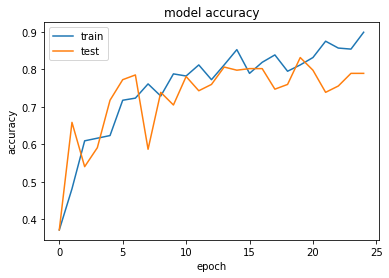

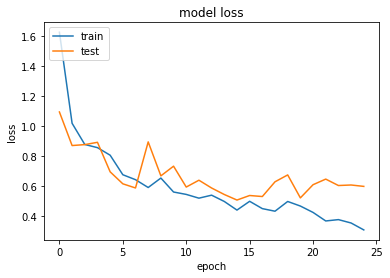

In [178]:
import matplotlib.pyplot as plt

print(H.history.keys())
#accuracy
plt.plot(H.history['accuracy'])
plt.plot(H.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
#loss
plt.plot(H.history['loss'])
plt.plot(H.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [179]:
print("[INFO] evaluating network...")
predictions = model.predict(testX, batch_size=32)
print(classification_report(testY.argmax(axis=1), predictions.argmax(axis=1), target_names=lb.classes_))

[INFO] evaluating network...
              precision    recall  f1-score   support

       coast       0.69      0.91      0.79        87
      forest       0.93      0.73      0.82        86
     highway       0.82      0.70      0.76        64

    accuracy                           0.79       237
   macro avg       0.81      0.78      0.79       237
weighted avg       0.81      0.79      0.79       237



In [ ]:
model.save('nmodel_scene')